<a href="https://colab.research.google.com/github/NovaNecros/PokeNetwork/blob/main/PokeNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [ ]:
# Obtener datos de google sheets

numGen = 9

sheet_url = []
sheet_url.append("https://docs.google.com/spreadsheets/d/1mMFw0bxJ5LC3CRQaQ3lRvYp9LEiRoSFxaJ4JDTdcjbI/gviz/tq?tqx=out:csv&sheet=Kanto&output=csv")
sheet_url.append("https://docs.google.com/spreadsheets/d/1mMFw0bxJ5LC3CRQaQ3lRvYp9LEiRoSFxaJ4JDTdcjbI/gviz/tq?tqx=out:csv&sheet=Johto&output=csv")
sheet_url.append("https://docs.google.com/spreadsheets/d/1mMFw0bxJ5LC3CRQaQ3lRvYp9LEiRoSFxaJ4JDTdcjbI/gviz/tq?tqx=out:csv&sheet=Hoenn&output=csv")
sheet_url.append("https://docs.google.com/spreadsheets/d/1mMFw0bxJ5LC3CRQaQ3lRvYp9LEiRoSFxaJ4JDTdcjbI/gviz/tq?tqx=out:csv&sheet=Sinnoh&output=csv")
sheet_url.append("https://docs.google.com/spreadsheets/d/1mMFw0bxJ5LC3CRQaQ3lRvYp9LEiRoSFxaJ4JDTdcjbI/gviz/tq?tqx=out:csv&sheet=Unova&output=csv")
sheet_url.append("https://docs.google.com/spreadsheets/d/1mMFw0bxJ5LC3CRQaQ3lRvYp9LEiRoSFxaJ4JDTdcjbI/gviz/tq?tqx=out:csv&sheet=Kalos&output=csv")
sheet_url.append("https://docs.google.com/spreadsheets/d/1mMFw0bxJ5LC3CRQaQ3lRvYp9LEiRoSFxaJ4JDTdcjbI/gviz/tq?tqx=out:csv&sheet=Alola&output=csv")
sheet_url.append("https://docs.google.com/spreadsheets/d/1mMFw0bxJ5LC3CRQaQ3lRvYp9LEiRoSFxaJ4JDTdcjbI/gviz/tq?tqx=out:csv&sheet=Galar&output=csv")
sheet_url.append("https://docs.google.com/spreadsheets/d/1mMFw0bxJ5LC3CRQaQ3lRvYp9LEiRoSFxaJ4JDTdcjbI/gviz/tq?tqx=out:csv&sheet=Paldea&output=csv")


df = pd.read_csv(sheet_url[0], sep=",", header=0).dropna(axis=1, how="all")
for i in range(1,numGen):
  df_aux = pd.read_csv(sheet_url[i], sep=",", header=0).dropna(axis=1, how="all")
  df = pd.concat([df, df_aux], axis=0, ignore_index=True)

#print("\n", df)

In [ ]:
tipos = ["Normal", "Fighting", "Flying", "Poison", "Ground", "Rock",
         "Bug", "Ghost", "Steel", "Fire", "Water", "Grass",
         "Electric", "Psychic", "Ice", "Dragon", "Dark", "Fairy"]

colores = ["darkkhaki", "firebrick", "mediumslateblue", "darkmagenta", "goldenrod", "darkgoldenrod",
           "yellowgreen", "darkslateblue", "silver", "darkorange", "cornflowerblue", "limegreen",
           "gold", "deeppink", "paleturquoise", "indigo", "black", "lightpink"]

In [ ]:
# Crear red bipartita de Pokemon-tipos

pokeNetwork = nx.Graph()

pokeNetwork.add_nodes_from(tipos, bipartite=0)
pokeNetwork.add_nodes_from(df["Nombre"].tolist(), bipartite=1)

for index,pkmn in df.iterrows():
  for ti in tipos:
      if pkmn["Tipo 1"] == ti or pkmn["Tipo 2"] == ti:
        pokeNetwork.add_edge(ti, pkmn["Nombre"])

In [ ]:
# Graficar red bipartita

pkmn_col = "lightblue"
node_clrs = []
node_sz = []

tipo = 0
for node,data in pokeNetwork.nodes(data=True):
  if data["bipartite"] == 1:
    node_clrs.append("cyan")
    node_sz.append(5)
  else:
    node_clrs.append(mcolors.to_rgba(colores[tipo],alpha=0.45))
    node_sz.append(300)
    tipo += 1
del tipo

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1062: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


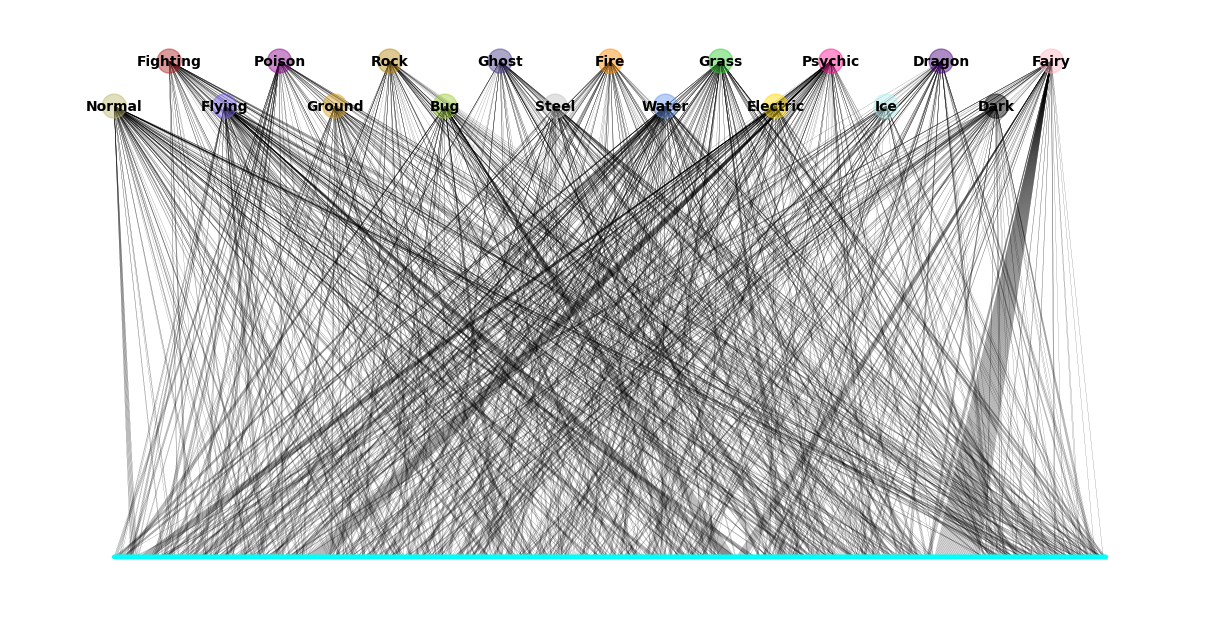

In [ ]:
layout = {}
for i, node in enumerate(tipos):
  layout[node] = (df.shape[0]*i/len(tipos), 1+0.1*(i%2))

for i, node in enumerate(df["Nombre"].tolist()):
  layout[node] = (i, (i%1)/1)

fig = plt.figure("Red de especies", figsize=(12,6))
nx.draw(pokeNetwork, pos = layout, with_labels=True, font_color = "black", node_color=node_clrs, edge_color="black",
        width = 0.1, font_weight="bold", font_size=10, node_size=node_sz, labels={node: node for node in tipos})
plt.show()

In [ ]:
# Crear proyeccion para red de tipos

typeNetwork = nx.Graph()
typeNetwork.add_nodes_from(tipos)

print("Combinaciones no usadas:\n")
for i in range(1,len(tipos)):
  for j in range(i):
    peso = len(list(nx.common_neighbors(pokeNetwork, tipos[i], tipos[j])))
    if peso > 0:
      typeNetwork.add_edge(tipos[i], tipos[j], weight=1/peso)
    else:
      print(tipos[i],tipos[j])

Combinaciones no usadas:

Rock Normal
Bug Normal
Ghost Rock
Steel Normal
Ice Normal
Ice Poison
Dragon Bug
Fairy Ground
Fairy Fire


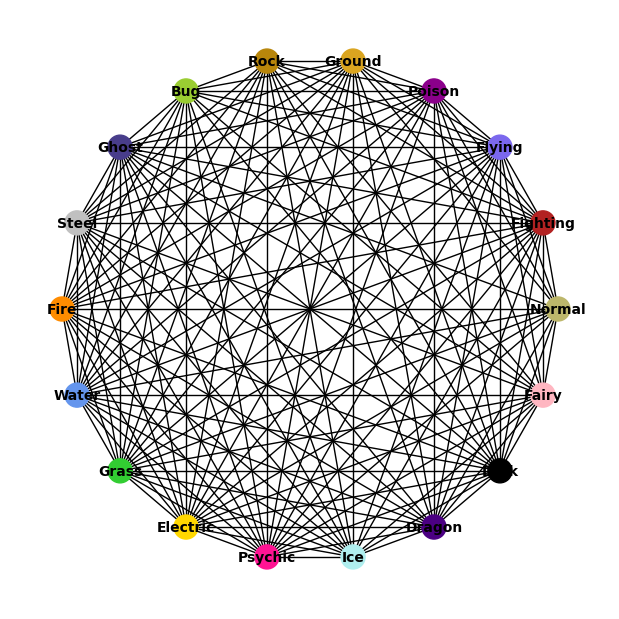

In [ ]:
# Graficar red de tipos
fig = plt.figure("Red de especies", figsize=(6,6))
nx.draw(typeNetwork, nx.circular_layout(typeNetwork), with_labels=True, font_color = "black", node_color=colores, edge_color="black",
        width = 1, font_weight="bold", font_size=10, node_size=300, labels={node: node for node in tipos})
#nx.draw_networkx_edge_labels(typeNetwork, nx.circular_layout(typeNetwork), edge_labels = {(u, v): data['weight'] for u, v, data in typeNetwork.edges(data=True)}, font_size=6)

plt.show()

In [ ]:
# Crear proyeccion para red de especies

speciesNetwork = nx.Graph()
speciesNetwork.add_nodes_from(df["Nombre"].tolist())

for i in range(1,df.shape[0]):
  for j in range(i):
    peso = len(list(nx.common_neighbors(pokeNetwork, df.loc[i, "Nombre"], df.loc[j, "Nombre"])))
    if peso > 0:
      speciesNetwork.add_edge(df.loc[i, "Nombre"], df.loc[j, "Nombre"])
del peso

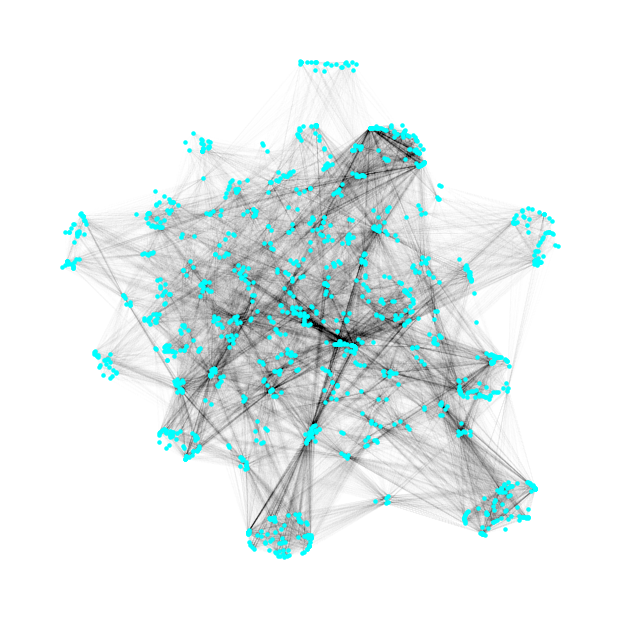

In [ ]:
# Graficar red de especies
fig = plt.figure("Red de especies", figsize=(6,6))
nx.draw(speciesNetwork, nx.spring_layout(speciesNetwork), with_labels=False, font_color = "black", node_color="cyan", edge_color="black",
        width = 0.001, font_weight="bold", font_size=10, node_size=5)
plt.show()

In [ ]:
degPokeTipos = []
for node,data in pokeNetwork.nodes(data=True):
  if data["bipartite"] == 1:
    degPokeTipos.append(pokeNetwork.degree(node))

t1 = degPokeTipos.count(1)
t2 = degPokeTipos.count(2)

print("Pokemon con un tipo:\t", t1)
print("Pokemon con dos tipos:\t", t2)

print("Promedio de tipos:", round((t1+2*t2)/(t1+t2),6))

Pokemon con un tipo:	 729
Pokemon con dos tipos:	 713
Promedio de tipos: 1.494452


In [ ]:
print(" tipo \t\t # pokemon")
for node,data in pokeNetwork.nodes(data=True):
  if data["bipartite"] == 0:
    print(node, "    \t", pokeNetwork.degree(node), "\t     ")

degrees = []
for ti in tipos:
  degrees.append(pokeNetwork.degree(ti))
maxDeg = degrees.index(max(degrees))
minDeg = degrees.index(min(degrees))

print("\n\n")
print("Tipo con mas Pokemon:\t\t", tipos[maxDeg], "\t", degrees[maxDeg])
print("Tipo con menos Pokemon:\t\t", tipos[minDeg], "\t", degrees[minDeg])
print("Pokemon promedio por tipo:\t\t", round(np.mean(degrees),4))

 tipo 		 # pokemon
Normal     	 167 	     
Fighting     	 96 	     
Flying     	 162 	     
Poison     	 102 	     
Ground     	 91 	     
Rock     	 97 	     
Bug     	 127 	     
Ghost     	 93 	     
Steel     	 94 	     
Fire     	 103 	     
Water     	 186 	     
Grass     	 161 	     
Electric     	 104 	     
Psychic     	 163 	     
Ice     	 68 	     
Dragon     	 94 	     
Dark     	 93 	     
Fairy     	 154 	     



Tipo con mas Pokemon:		 Water 	 186
Tipo con menos Pokemon:		 Ice 	 68
Pokemon promedio por tipo:		 119.7222


In [ ]:
# Tamaño, Orden y Densidad
print("Red de tipos")
print("orden:\t\t", len(typeNetwork.nodes))
print("tam:\t\t", len(typeNetwork.edges))
print("densidad:\t", round(nx.density(typeNetwork),6))
print("\n\n")


print("Red de especies")
print("orden:\t\t", len(speciesNetwork.nodes))
print("tam:\t\t", len(speciesNetwork.edges))
print("densidad:\t", round(nx.density(speciesNetwork),6))

Red de tipos
orden:		 18
tam:		 144
densidad:	 0.941176



Red de especies
orden:		 1442
tam:		 135786
densidad:	 0.130694


In [ ]:
# Excentricidades, Radio y Diametro de la red de tipos
Ecc = nx.eccentricity(typeNetwork, weight = "weight")

r = 0.2303
d = 0.3472





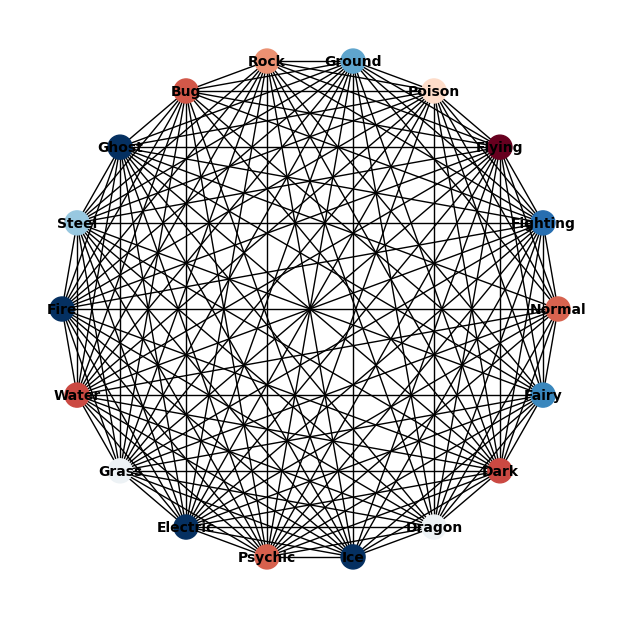

In [ ]:
r = min(Ecc.values())
d = max(Ecc.values())
eccNormalized = {node: (ecc - r) / (d - r) for node, ecc in Ecc.items()}
eccCols = [plt.cm.RdBu(ecc) for ecc in eccNormalized.values()]

print("r =", round(r,4))
print("d =", round(d,4))
print("\n\n")

fig = plt.figure("Red de tipos - Excentricidades", figsize=(6,6))
nx.draw(typeNetwork, nx.circular_layout(typeNetwork), with_labels=True, font_color = "black", node_color=eccCols, edge_color="black",
        width = 1, font_weight="bold", font_size=10, node_size=300, labels={node: node for node in tipos})
plt.show()

In [ ]:
# Excentricidades, Radio y Diametro de la red de especies
Ecc2 = nx.eccentricity(speciesNetwork)

r = 2
d = 3





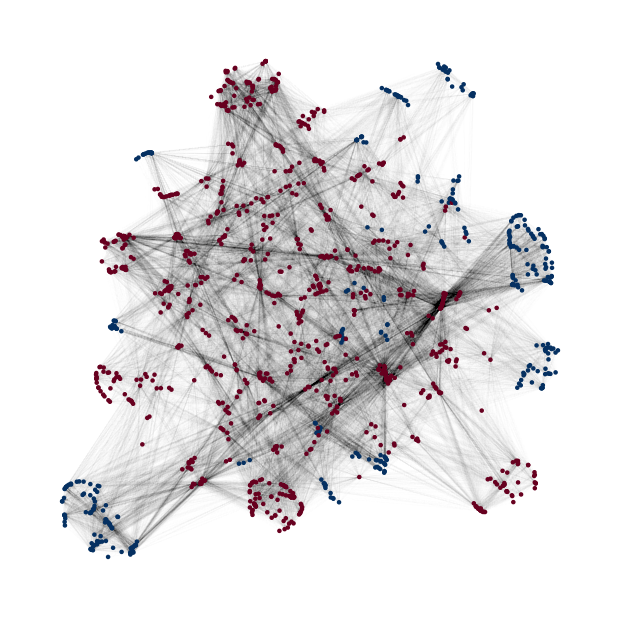

In [ ]:
r = min(Ecc2.values())
d = max(Ecc2.values())
eccNormalized = {node: (ecc - r) / (d - r) for node, ecc in Ecc2.items()}
eccCols = [plt.cm.RdBu(ecc) for ecc in eccNormalized.values()]

print("r =", round(r,4))
print("d =", round(d,4))
print("\n\n")

fig = plt.figure("Red de especies - Centralidad por Grado", figsize=(6,6))
nx.draw(speciesNetwork, nx.spring_layout(speciesNetwork), with_labels=False, font_color = "black", node_color=eccCols, edge_color="black",
        width = 0.001, font_weight="bold", font_size=10, node_size=5)
plt.show()

In [ ]:
#Centralidad por Grado de la red de tipos
Cd = nx.degree_centrality(typeNetwork)

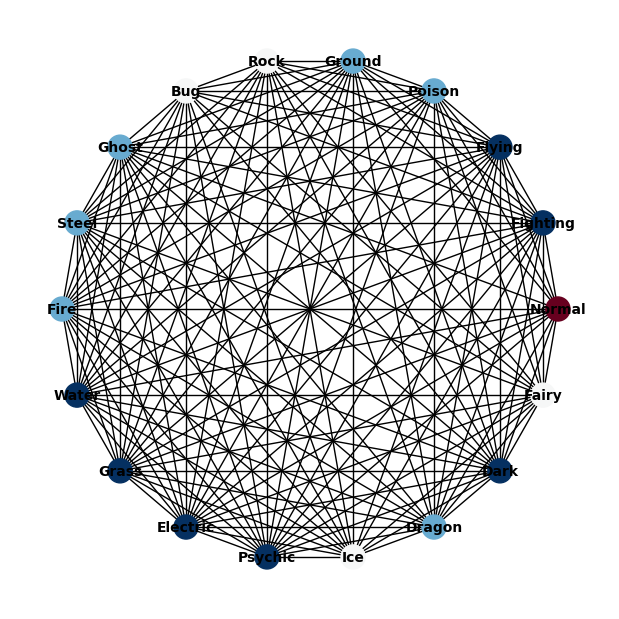

In [ ]:
cdMin = min(Cd.values())
cdMax = max(Cd.values())
cdNormalized = {node: (cd - cdMin) / (cdMax - cdMin) for node, cd in Cd.items()}
cdCols = [plt.cm.RdBu(cd) for cd in cdNormalized.values()]

fig = plt.figure("Red de tipos - Centralidad por Grado", figsize=(6,6))
nx.draw(typeNetwork, nx.circular_layout(typeNetwork), with_labels=True, font_color = "black", node_color=cdCols, edge_color="black",
        width = 1, font_weight="bold", font_size=10, node_size=300, labels={node: node for node in tipos})
plt.show()

In [ ]:
#Centralidad por Grado de la red de especies
Cd2 = nx.degree_centrality(speciesNetwork)

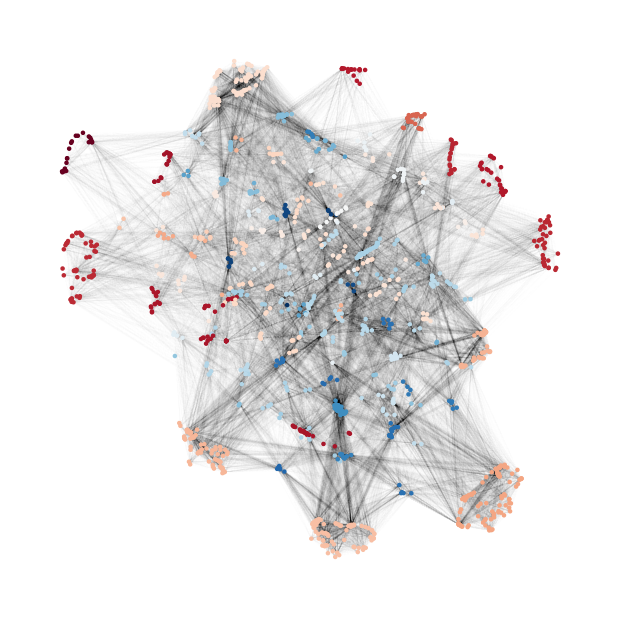

In [ ]:
cdMin = min(Cd2.values())
cdMax = max(Cd2.values())
cdNormalized = {node: (cd - cdMin) / (cdMax - cdMin) for node, cd in Cd2.items()}
cdCols = [plt.cm.RdBu(cd) for cd in cdNormalized.values()]

fig = plt.figure("Red de especies - Centralidad por Grado", figsize=(6,6))
nx.draw(speciesNetwork, nx.spring_layout(speciesNetwork), with_labels=False, font_color = "black", node_color=cdCols, edge_color="black",
        width = 0.001, font_weight="bold", font_size=10, node_size=5)
plt.show()

In [ ]:
#Centralidad por Cercania de la red de tipos
Cc = nx.closeness_centrality(typeNetwork, distance = "weight")

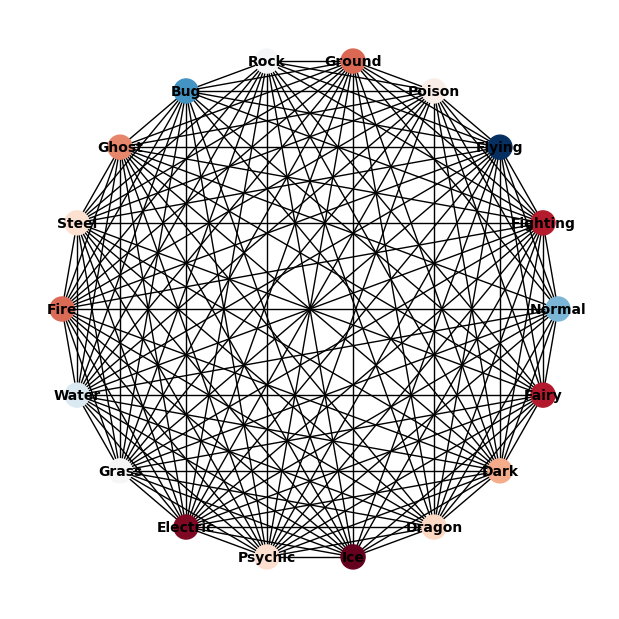

In [ ]:
ccMin = min(Cc.values())
ccMax = max(Cc.values())
ccNormalized = {node: (cc - ccMin) / (ccMax - ccMin) for node, cc in Cc.items()}
ccCols = [plt.cm.RdBu(cc) for cc in ccNormalized.values()]

fig = plt.figure("Red de tipos - Centralidad por Cercania", figsize=(6,6))
nx.draw(typeNetwork, nx.circular_layout(typeNetwork), with_labels=True, font_color = "black", node_color=ccCols, edge_color="black",
        width = 1, font_weight="bold", font_size=10, node_size=300, labels={node: node for node in tipos})
plt.show()

In [ ]:
#Centralidad por Cercania de la red de especies
Cc2 = nx.closeness_centrality(speciesNetwork)

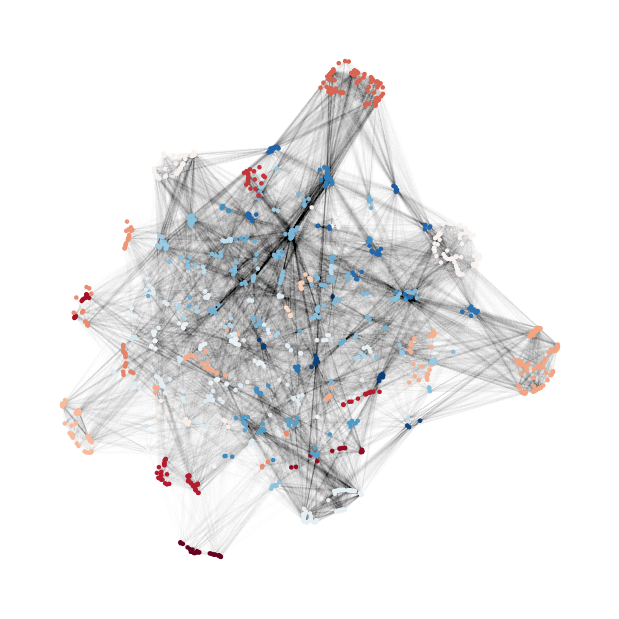

In [ ]:
ccMin = min(Cc2.values())
ccMax = max(Cc2.values())
ccNormalized = {node: (cc - ccMin) / (ccMax - ccMin) for node, cc in Cc2.items()}
ccCols = [plt.cm.RdBu(cc) for cc in ccNormalized.values()]

fig = plt.figure("Red de especies - Centralidad por Cercania", figsize=(6,6))
nx.draw(speciesNetwork, nx.spring_layout(speciesNetwork), with_labels=False, font_color = "black", node_color=ccCols, edge_color="black",
        width = 0.001, font_weight="bold", font_size=10, node_size=5)
plt.show()

In [ ]:
#Centralidad por Intermediacion de la red de tipos
Cb = nx.betweenness_centrality(typeNetwork, weight = "weight")

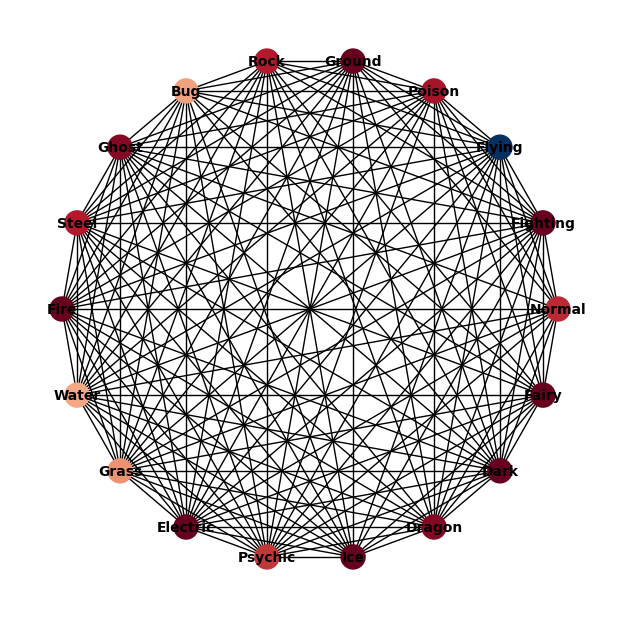

In [ ]:
cbMin = min(Cb.values())
cbMax = max(Cb.values())
cbNormalized = {node: (cb - cbMin) / (cbMax - cbMin) for node, cb in Cb.items()}
cbCols = [plt.cm.RdBu(cb) for cb in cbNormalized.values()]

fig = plt.figure("Red de tipos - Centralidad por Intermediacion", figsize=(6,6))
nx.draw(typeNetwork, nx.circular_layout(typeNetwork), with_labels=True, font_color = "black", node_color=cbCols, edge_color="black",
        width = 1, font_weight="bold", font_size=10, node_size=300, labels={node: node for node in tipos})
plt.show()

In [ ]:
#Centralidad por Intermediacion de la red de especies
Cb2 = nx.betweenness_centrality(speciesNetwork)

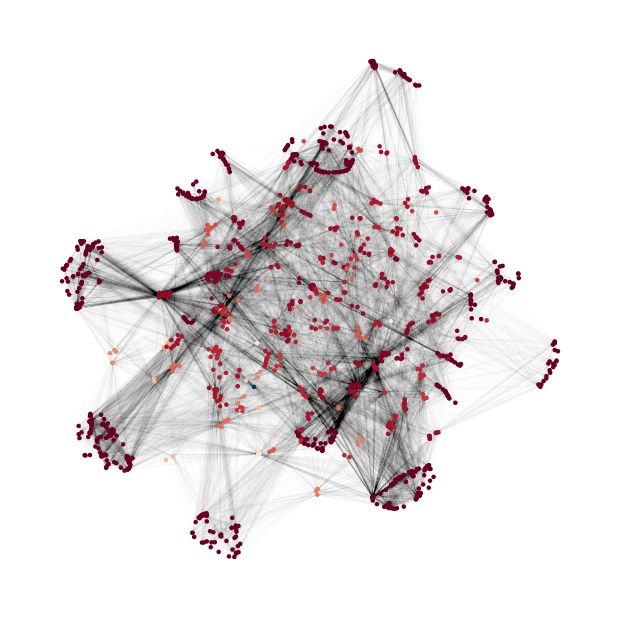

In [ ]:
cbMin = min(Cb2.values())
cbMax = max(Cb2.values())
cbNormalized = {node: (cb - cbMin) / (cbMax - cbMin) for node, cb in Cb2.items()}
cbCols = [plt.cm.RdBu(cb) for cb in cbNormalized.values()]

fig = plt.figure("Red de especies - Centralidad por Intermediacion", figsize=(6,6))
nx.draw(speciesNetwork, nx.spring_layout(speciesNetwork), with_labels=False, font_color = "black", node_color=cbCols, edge_color="black",
        width = 0.001, font_weight="bold", font_size=10, node_size=5)
plt.show()

In [ ]:
#Centralidad por Eigenvector de la red de tipos
Ce = nx.eigenvector_centrality_numpy(typeNetwork, weight = "weight")

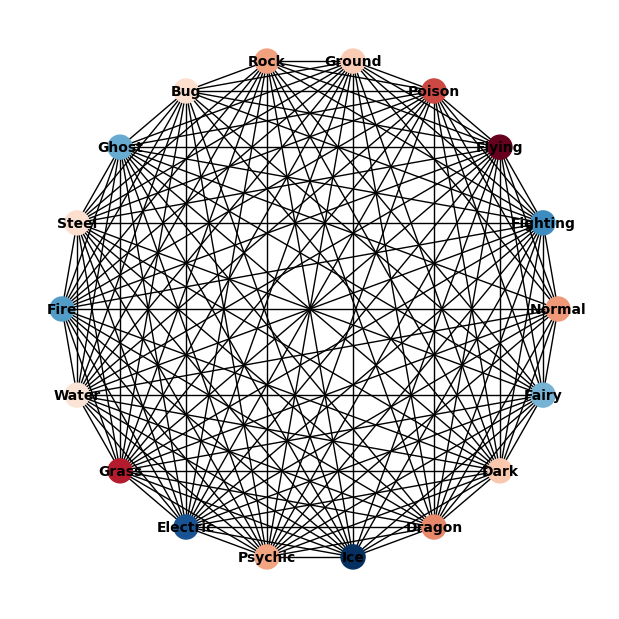

In [ ]:
ceMin = min(Ce.values())
ceMax = max(Ce.values())
ceNormalized = {node: (ce - ceMin) / (ceMax - ceMin) for node, ce in Ce.items()}
ceCols = [plt.cm.RdBu(ce) for ce in ceNormalized.values()]

fig = plt.figure("Red de tipos - Centralidad por Eigenvector", figsize=(6,6))
nx.draw(typeNetwork, nx.circular_layout(typeNetwork), with_labels=True, font_color = "black", node_color=ceCols, edge_color="black",
        width = 1, font_weight="bold", font_size=10, node_size=300, labels={node: node for node in tipos})
plt.show()

In [ ]:
#Centralidad por Eigenvector de la red de especies
Ce2 = nx.eigenvector_centrality_numpy(speciesNetwork)

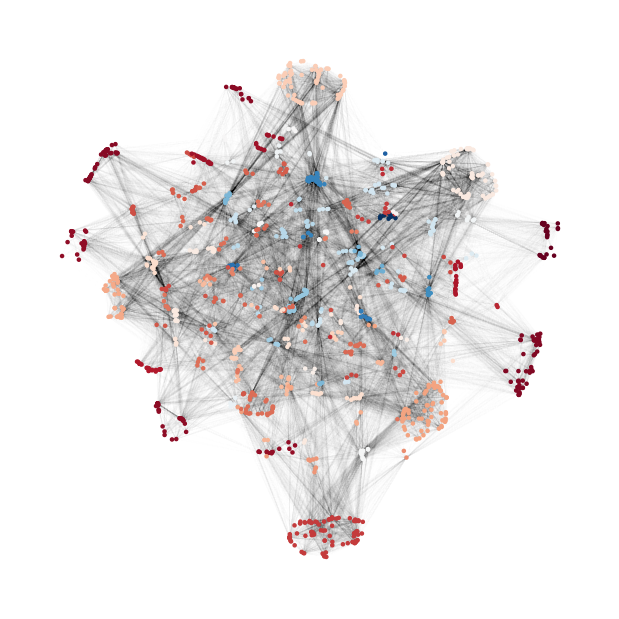

In [ ]:
ceMin = min(Ce2.values())
ceMax = max(Ce2.values())
ceNormalized = {node: (ce - ceMin) / (ceMax - ceMin) for node, ce in Ce2.items()}
ceCols = [plt.cm.RdBu(ce) for ce in ceNormalized.values()]

fig = plt.figure("Red de especies - Centralidad por Eigenvector", figsize=(6,6))
nx.draw(speciesNetwork, nx.spring_layout(speciesNetwork), with_labels=False, font_color = "black", node_color=ceCols, edge_color="black",
        width = 0.001, font_weight="bold", font_size=10, node_size=5)
plt.show()

In [ ]:
#Pagerank de la red de tipos
Pr = nx.pagerank(typeNetwork, weight='weight')

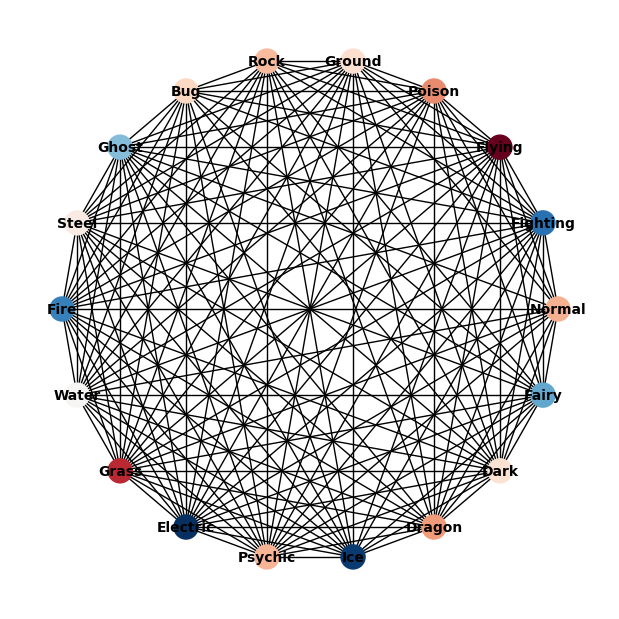

In [ ]:
prMin = min(Pr.values())
prMax = max(Pr.values())
prNormalized = {node: (pr - prMin) / (prMax - prMin) for node, pr in Pr.items()}
prCols = [plt.cm.RdBu(pr) for pr in prNormalized.values()]

fig = plt.figure("Red de tipos - Pagerank", figsize=(6,6))
nx.draw(typeNetwork, nx.circular_layout(typeNetwork), with_labels=True, font_color = "black", node_color=prCols, edge_color="black",
        width = 1, font_weight="bold", font_size=10, node_size=300, labels={node: node for node in tipos})
plt.show()

In [ ]:
#Pagerank de la red de especies
Pr2 = nx.pagerank(speciesNetwork)

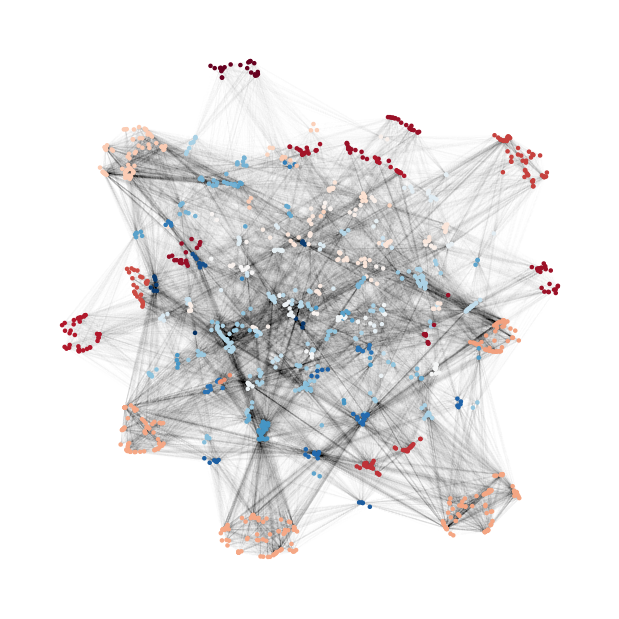

In [ ]:
prMin = min(Pr2.values())
prMax = max(Pr2.values())
prNormalized = {node: (pr - prMin) / (prMax - prMin) for node, pr in Pr2.items()}
prCols = [plt.cm.RdBu(pr) for pr in prNormalized.values()]

fig = plt.figure("Red de especies - Centralidad por Eigenvector", figsize=(6,6))
nx.draw(speciesNetwork, nx.spring_layout(speciesNetwork), with_labels=False, font_color = "black", node_color=prCols, edge_color="black",
        width = 0.001, font_weight="bold", font_size=10, node_size=5)
plt.show()

In [ ]:
#Clustering local de la red de tipos
Cl = nx.clustering(typeNetwork)

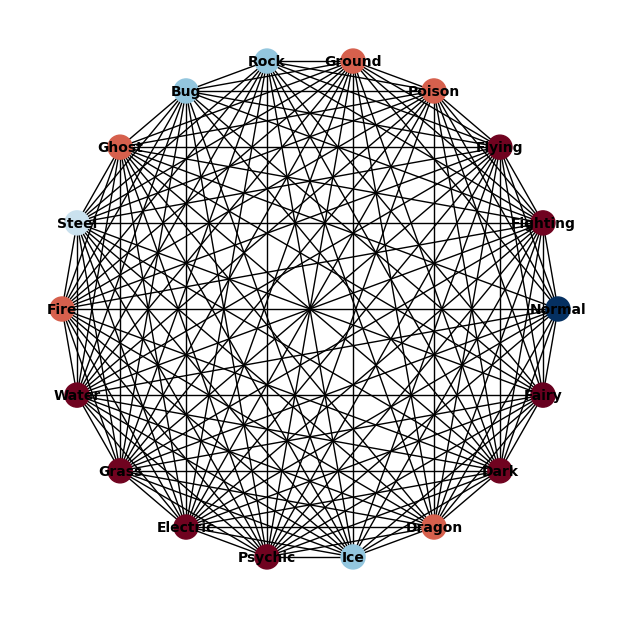

In [ ]:
clMin = min(Cl.values())
clMax = max(Cl.values())
clNormalized = {node: (cl - clMin) / (clMax - clMin) for node, cl in Cl.items()}
clCols = [plt.cm.RdBu(cl) for cl in clNormalized.values()]

fig = plt.figure("Red de tipos - Clustering Local", figsize=(6,6))
nx.draw(typeNetwork, nx.circular_layout(typeNetwork), with_labels=True, font_color = "black", node_color = clCols, edge_color="black",
        width = 1, font_weight="bold", font_size=10, node_size=300, labels={node: node for node in tipos})
plt.show()

In [ ]:
#Clustering local de la red de especies
Cl2 = nx.clustering(speciesNetwork)

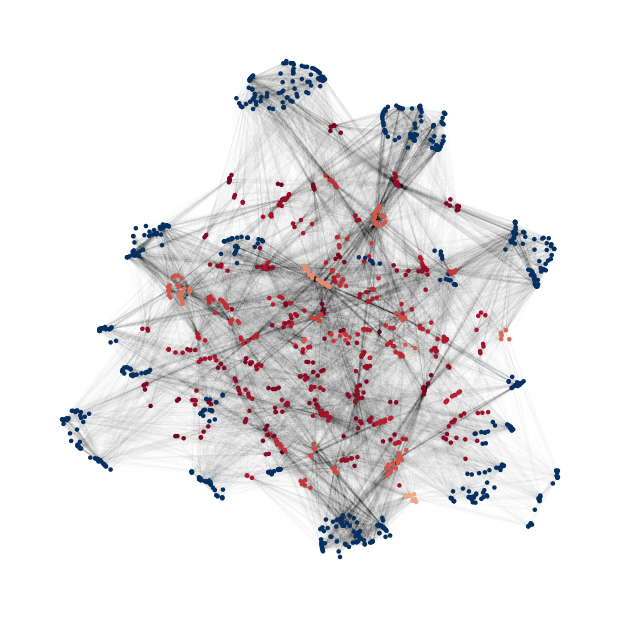

In [ ]:
clMin = min(Cl2.values())
clMax = max(Cl2.values())
clNormalized = {node: (cl - clMin) / (clMax - clMin) for node, cl in Cl2.items()}
clCols = [plt.cm.RdBu(cl) for cl in clNormalized.values()]

fig = plt.figure("Red de especies - Centralidad por Eigenvector", figsize=(6,6))
nx.draw(speciesNetwork, nx.spring_layout(speciesNetwork), with_labels=False, font_color = "black", node_color=clCols, edge_color="black",
        width = 0.001, font_weight="bold", font_size=10, node_size=5)
plt.show()

In [ ]:
#Clustering global de las redes de tipos y especies
print("Red de tipos")
print("CL =\t", round(nx.transitivity(typeNetwork),6))
print("\n\n")

print("Red de especies")
print("CL =\t", round(nx.transitivity(speciesNetwork),6))

Red de tipos
CL =	 0.942857



Red de especies
CL =	 0.672415


In [ ]:
pk = "Spiritomb"

print(" pokemon \t    Cd   \t    Cc   \t    Cb   \t    Ce  \t    PR  \t    Cl  ")
print(pk, "\t", round(Cd2[pk],8), "\t", round(Cc2[pk],8), "\t", round(Cb2[pk],8), "\t", round(Ce2[pk],8), "\t", round(Pr2[pk],8), "\t", round(Cl2[pk],8))

 pokemon 	    Cd   	    Cc   	    Cb   	    Ce  	    PR  	    Cl  
Spiritomb 	 0.12630118 	 0.5337037 	 0.0008045 	 0.01658522 	 0.00070473 	 0.52941534


In [ ]:
sheet_url = "https://docs.google.com/spreadsheets/d/1mMFw0bxJ5LC3CRQaQ3lRvYp9LEiRoSFxaJ4JDTdcjbI/gviz/tq?tqx=out:csv&sheet=Matchups&output=csv"
dfMU = pd.read_csv(sheet_url, sep=",", header=0)

dfMU = dfMU.dropna(axis=1, how="all")
dfMU.index = dfMU.iloc[:, 0]
dfMU = dfMU.iloc[:, 1:]
dfMU = dfMU.astype(float)
#dfMU =  2*dfMU - 1
#dfMU[dfMU < 0] = dfMU[dfMU < 0] * 6
print(dfMU)

            Normal  Fighting  Flying  Poison  Ground  Rock  Bug  Ghost  Steel  \
Unnamed: 0                                                                      
Normal         1.0       1.0     1.0     1.0     1.0   0.5  1.0    0.0    0.5   
Fighting       2.0       1.0     0.5     0.5     1.0   2.0  0.5    0.0    2.0   
Flying         1.0       2.0     1.0     1.0     1.0   0.5  2.0    1.0    0.5   
Poison         1.0       1.0     1.0     0.5     0.5   0.5  1.0    0.5    0.0   
Ground         1.0       1.0     0.0     2.0     1.0   2.0  0.5    1.0    2.0   
Rock           1.0       0.5     2.0     1.0     0.5   1.0  2.0    1.0    0.5   
Bug            1.0       0.5     0.5     0.5     1.0   1.0  1.0    0.5    0.5   
Ghost          0.0       1.0     1.0     1.0     1.0   1.0  1.0    2.0    1.0   
Steel          1.0       1.0     1.0     1.0     1.0   2.0  1.0    1.0    0.5   
Fire           1.0       1.0     1.0     1.0     1.0   0.5  2.0    1.0    2.0   
Water          1.0       1.0

In [ ]:
#Prebalance

ofensa = np.zeros(len(tipos))
defensa = np.zeros(len(tipos))

for i in range(len(tipos)):
  for j in range(len(tipos)):
    for k in range(j):
      ofensa[i] += (dfMU.at[tipos[i], tipos[j]]*dfMU.at[tipos[i], tipos[k]])
    ofensa[i] += dfMU.at[tipos[i], tipos[j]]

for i in range(len(tipos)):
  for j in range(len(tipos)):
    for k in range(len(tipos)):
        defensa[i] += np.sqrt(dfMU.at[tipos[k], tipos[i]]*dfMU.at[tipos[k], tipos[j]])

ofensa /= max(ofensa)
defensa = (max(defensa) + min(defensa) - defensa)/max(defensa)
balance = ofensa - defensa

In [ ]:
print("Tipo     \t Ofensa     \t Defensa     \t Balance")
for i in range(len(tipos)):
  print(tipos[i], "     \t", round(ofensa[i],6), "   \t", round(defensa[i],6), "   \t", round(balance[i],6))

print()
print("Media     \t", round(np.mean(ofensa),6), "\t", round(np.mean(defensa),6), "\t", round(np.mean(balance),6))
print("CV        \t", round(np.std(ofensa)/abs(np.mean(ofensa)),6), "\t", round(np.std(defensa)/abs(np.mean(defensa)),6), "\t", round(np.std(balance)/abs(np.mean(balance)),6))

Tipo     	 Ofensa     	 Defensa     	 Balance
Normal      	 0.60221    	 0.89642    	 -0.29421
Fighting      	 0.864088    	 0.869653    	 -0.005564
Flying      	 0.871823    	 0.899373    	 -0.02755
Poison      	 0.669613    	 0.897358    	 -0.227745
Ground      	 1.0    	 0.881    	 0.119
Rock      	 0.958011    	 0.818065    	 0.139946
Bug      	 0.706077    	 0.844979    	 -0.138901
Ghost      	 0.78895    	 0.951693    	 -0.162742
Steel      	 0.828729    	 1.0    	 -0.171271
Fire      	 0.912707    	 0.891082    	 0.021625
Water      	 0.871823    	 0.888026    	 -0.016203
Grass      	 0.706077    	 0.819623    	 -0.113546
Electric      	 0.708287    	 0.889834    	 -0.181547
Psychic      	 0.748066    	 0.832822    	 -0.084755
Ice      	 0.912707    	 0.794449    	 0.118258
Dragon      	 0.711602    	 0.862567    	 -0.150965
Dark      	 0.790055    	 0.883454    	 -0.093399
Fairy      	 0.790055    	 0.919536    	 -0.129481

Media     	 0.802271 	 0.879996 	 -0.077725
CV        

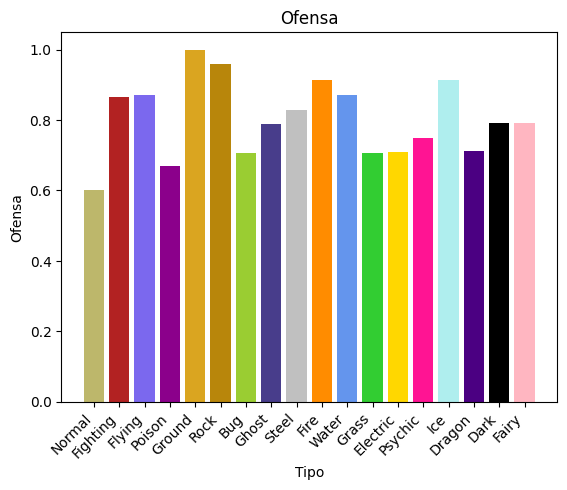

In [ ]:
plt.bar(tipos, ofensa, color = colores)

plt.xlabel('Tipo')
plt.ylabel('Ofensa')
plt.title('Ofensa')

plt.xticks(rotation=45, ha="right")

plt.show()

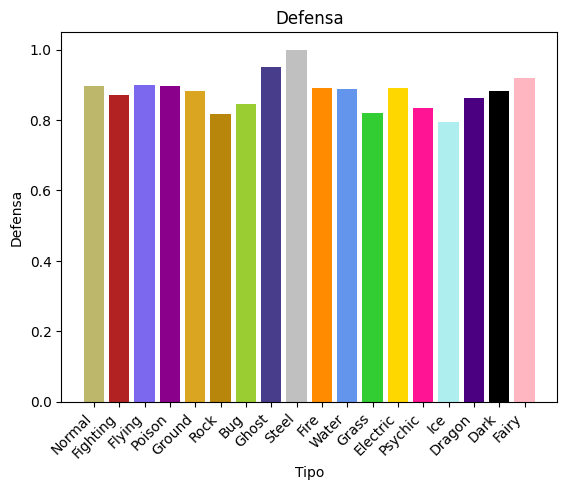

In [ ]:
plt.bar(tipos, defensa, color = colores)

plt.xlabel('Tipo')
plt.ylabel('Defensa')
plt.title('Defensa')

plt.xticks(rotation=45, ha="right")

plt.show()

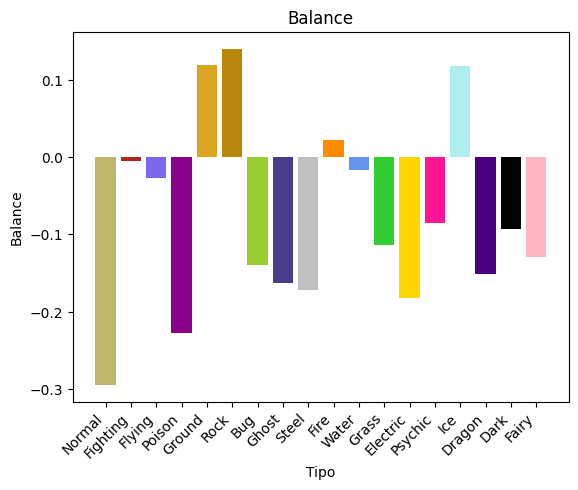

In [ ]:
plt.bar(tipos, balance, color = colores)

plt.xlabel('Tipo')
plt.ylabel('Balance')
plt.title('Balance')

plt.xticks(rotation=45, ha="right")

plt.show()

In [ ]:
#Con numero de pokemon

ofensa = np.zeros(len(tipos))
defensa = np.zeros(len(tipos))

for i in range(len(tipos)):
  for j in range(len(tipos)):
    for k in range(j):
      ofensa[i] += (dfMU.at[tipos[i], tipos[j]]*dfMU.at[tipos[i], tipos[k]])*degrees[i]*degrees[j]
    ofensa[i] += dfMU.at[tipos[i], tipos[j]]*degrees[j]

for i in range(len(tipos)):
  for j in range(len(tipos)):
    for k in range(len(tipos)):
        defensa[i] += np.sqrt(dfMU.at[tipos[k], tipos[i]]*dfMU.at[tipos[k], tipos[j]])*degrees[k]

ofensa /= max(ofensa)
defensa = (max(defensa) + min(defensa) - defensa)/max(defensa)
balance = ofensa - defensa

In [ ]:
print("Tipo     \t Ofensa     \t Defensa     \t Balance")
for i in range(len(tipos)):
  print(tipos[i], "     \t", round(ofensa[i],6), "   \t", round(defensa[i],6), "   \t", round(balance[i],6))

print()
print("Media     \t", round(np.mean(ofensa),6), "\t", round(np.mean(defensa),6), "\t", round(np.mean(balance),6))
print("CV        \t", round(np.std(ofensa)/abs(np.mean(ofensa)),6), "\t", round(np.std(defensa)/abs(np.mean(defensa)),6), "\t", round(np.std(balance)/abs(np.mean(balance)),6))

Tipo     	 Ofensa     	 Defensa     	 Balance
Normal      	 0.642454    	 0.871854    	 -0.2294
Fighting      	 0.485344    	 0.830902    	 -0.345557
Flying      	 0.939725    	 0.888859    	 0.050866
Poison      	 0.462123    	 0.88319    	 -0.421066
Ground      	 0.565219    	 0.841879    	 -0.276661
Rock      	 0.58333    	 0.801442    	 -0.218113
Bug      	 0.576693    	 0.824939    	 -0.248247
Ghost      	 0.484145    	 0.952296    	 -0.468151
Steel      	 0.491806    	 1.0    	 -0.508194
Fire      	 0.591052    	 0.869062    	 -0.27801
Water      	 1.0    	 0.86242    	 0.13758
Grass      	 0.743191    	 0.816266    	 -0.073075
Electric      	 0.492751    	 0.878192    	 -0.385441
Psychic      	 0.779688    	 0.825525    	 -0.045838
Ice      	 0.40206    	 0.785547    	 -0.383487
Dragon      	 0.402589    	 0.862561    	 -0.459972
Dark      	 0.477064    	 0.874238    	 -0.397174
Fairy      	 0.754502    	 0.893861    	 -0.139359

Media     	 0.604096 	 0.864613 	 -0.260517
CV   

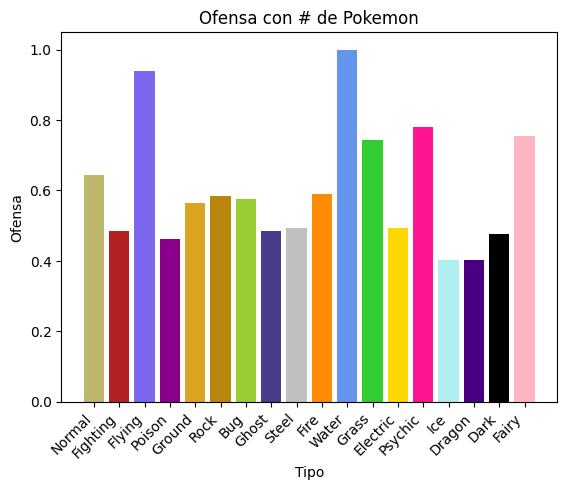

In [ ]:
plt.bar(tipos, ofensa, color = colores)

plt.xlabel('Tipo')
plt.ylabel('Ofensa')
plt.title('Ofensa con # de Pokemon')

plt.xticks(rotation=45, ha="right")

plt.show()

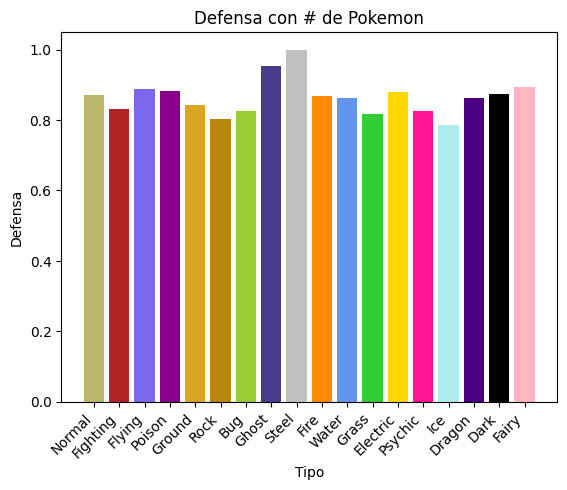

In [ ]:
plt.bar(tipos, defensa, color = colores)

plt.xlabel('Tipo')
plt.ylabel('Defensa')
plt.title('Defensa con # de Pokemon')

plt.xticks(rotation=45, ha="right")

plt.show()

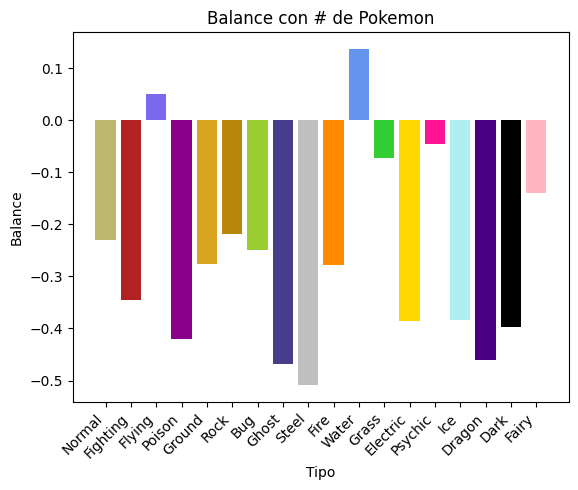

In [ ]:
plt.bar(tipos, balance, color = colores)

plt.xlabel('Tipo')
plt.ylabel('Balance')
plt.title('Balance con # de Pokemon')

plt.xticks(rotation=45, ha="right")

plt.show()